# (1) Mengumpulkan Data

### Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC as SVM
from sklearn.metrics import classification_report,accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score
from sklearn.model_selection import cross_val_score

### Load Dataset

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive') # default
path_data = '/content/drive/My Drive/My DriveColab Notebooks/Dataset/fetal_health.csv'

Mounted at /content/drive


In [ ]:
path_data = '/content/drive/My Drive/Colab Notebooks/Dataset/fetal_health.csv'
df = pd.read_csv(path_data, sep=';')

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,NaN,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# (2) Menelaah Data

### Infromasi Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    1914 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                1914 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

### Menampilkan Statistik Data

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,1914.000000,2126.000000,2126.000000,1914.000000,1914.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004372,0.001889,0.000003,0.000158,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.477011,134.610536,138.090310,19.020899,0.319749,1.304327
std,9.840844,0.003866,0.046666,0.002953,0.002960,0.000057,0.000592,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.434563,15.593596,14.466589,29.628676,0.610208,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,212
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,212
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


### Distribusi Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

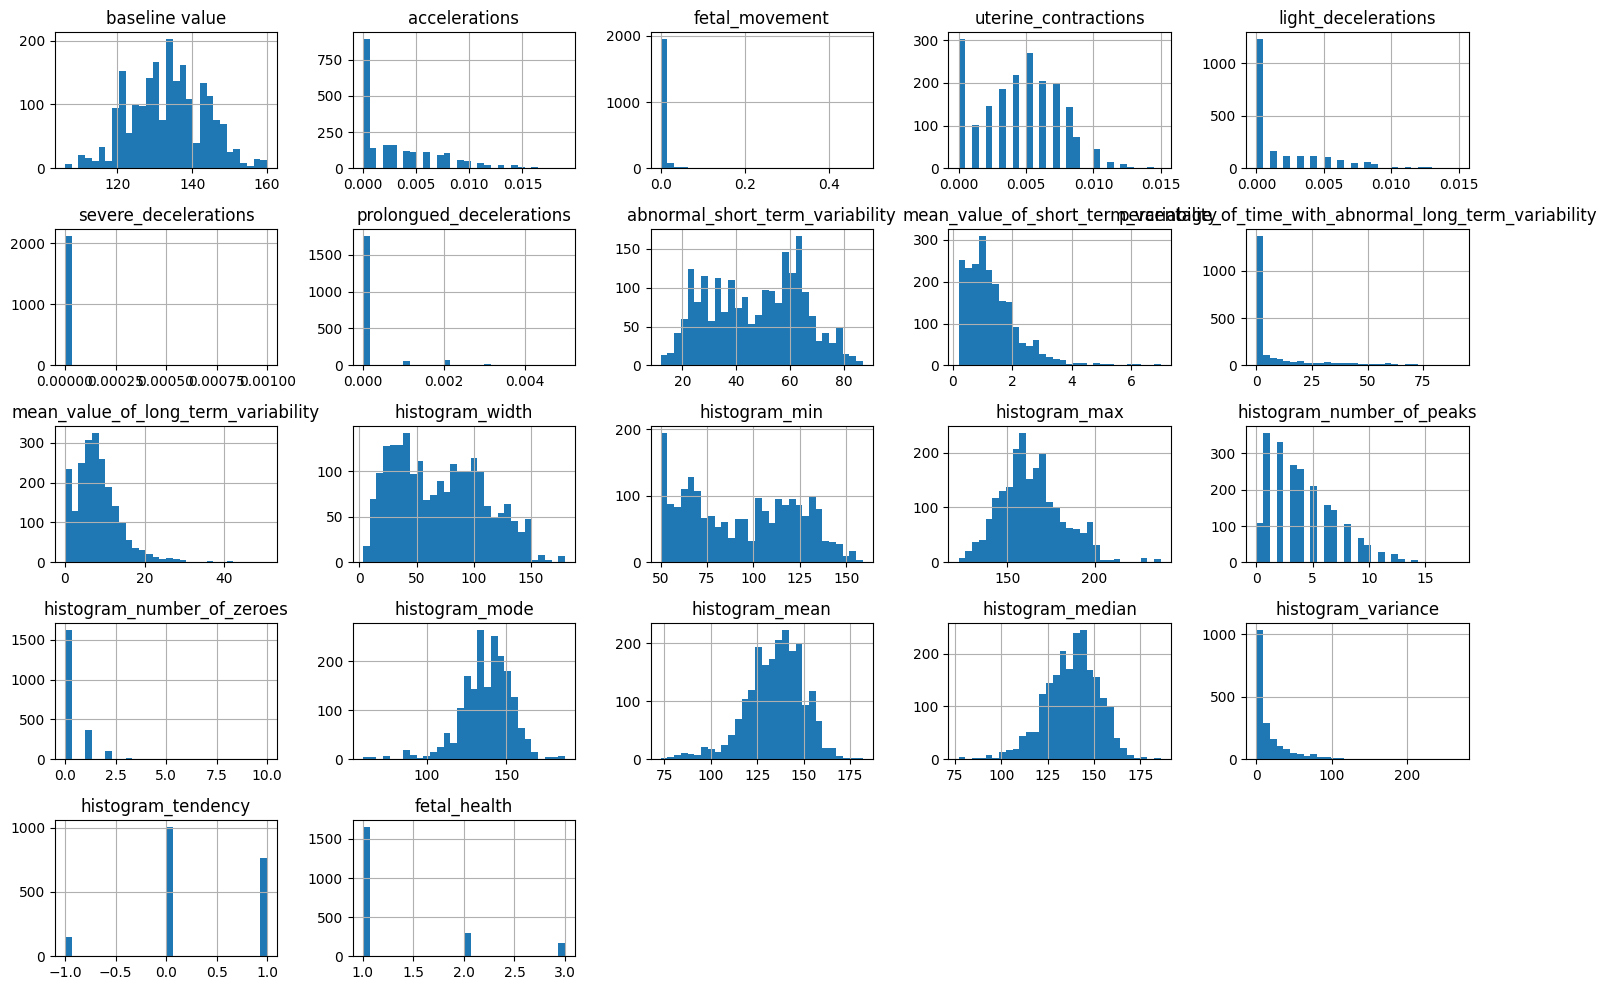

In [ ]:
# Memisahkan fitur numerik
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Visualisasi Fitur Numerik (Bar Chart Saja)
plt.figure(figsize=(12, 6))
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


# (3) Memvalidasi Data

### Cek Tipedata

In [ ]:
print(df.dtypes)

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

### Cek Missing Values

In [ ]:
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,212
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,212
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


### Cek Duplicated Values

In [ ]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

Jumlah baris duplikat: 5


### Cek Unique Values

### Cek Outlier

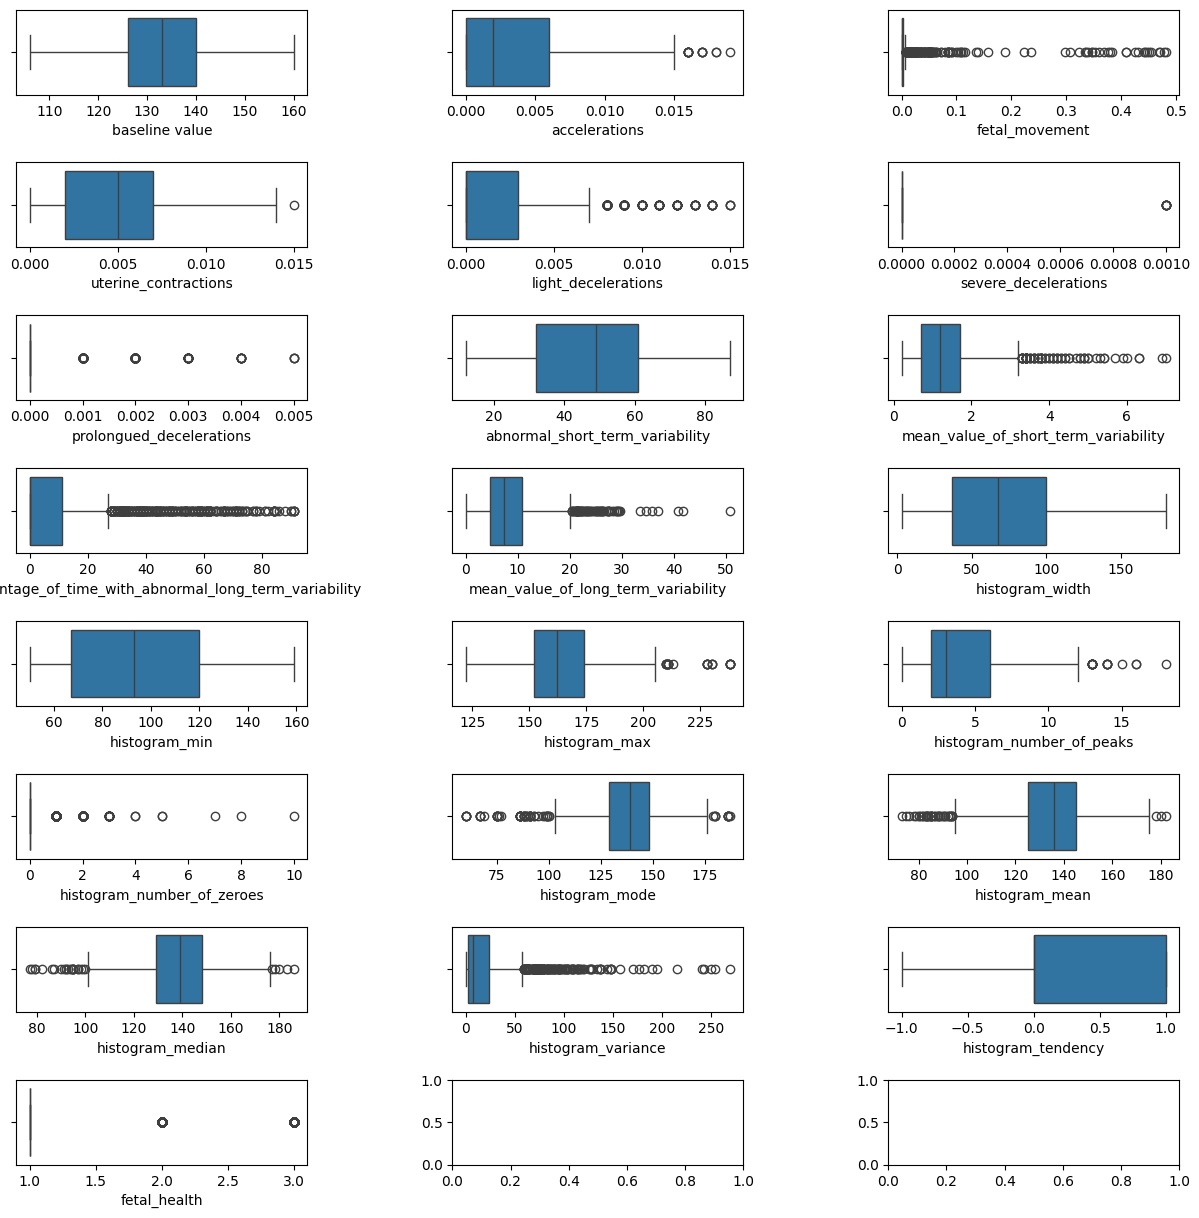

In [ ]:
num_cols = 3
num_rows = math.ceil(len(df.columns) / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

plt.subplots_adjust(hspace=0.8, wspace=0.5)

for i, column in enumerate(df.columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=df[column], ax=axes[row, col])

plt.show()

In [ ]:
# Menghitung jumlah nilai unik untuk setiap kolom
unique_values = {}
for col in df.columns:
    unique_count = df[col].nunique()
    unique_values[col] = unique_count

for col, count in unique_values.items():
    print(f"{col:<20} : {count:>5}")


baseline value       :    48
accelerations        :    20
fetal_movement       :   102
uterine_contractions :    16
light_decelerations  :    16
severe_decelerations :     2
prolongued_decelerations :     6
abnormal_short_term_variability :    75
mean_value_of_short_term_variability :    57
percentage_of_time_with_abnormal_long_term_variability :    87
mean_value_of_long_term_variability :   249
histogram_width      :   154
histogram_min        :   109
histogram_max        :    86
histogram_number_of_peaks :    18
histogram_number_of_zeroes :     9
histogram_mode       :    87
histogram_mean       :   103
histogram_median     :    95
histogram_variance   :   131
histogram_tendency   :     3
fetal_health         :     3


# (4) Menentukan Objek Data

In [ ]:
features = [col for col in df.columns if col != 'fetal_health']
print("Features:", features)

Features: ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']


In [ ]:
data = df.drop('fetal_health', axis=1)
data_label = df['fetal_health']

In [ ]:
data_label.head()

,fetal_health
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0


# (5) Membersihkan Data

### Menangani Missing Value

In [ ]:
# Menggunakan Imputasi Mean untuk semua kolom
imputer_numeric = SimpleImputer(strategy='median')
df = pd.DataFrame(imputer_numeric.fit_transform(df), columns=df.columns)

In [ ]:
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


### Drop duplicated values

In [ ]:
df.drop_duplicates(inplace=True)

# Verify the number of duplicates after dropping
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat setelah dihapus: {duplicates}")

Jumlah baris duplikat setelah dihapus: 0


### Menangani outlier

In [ ]:
# DETECT OUTLIER IQR
def detect_outlier_iqr_all_columns(df):
    outliers_dict = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        data = df[col].dropna()
        data_sorted = sorted(data)
        q1 = np.percentile(data_sorted, 25)
        q3 = np.percentile(data_sorted, 75)

        IQR = q3 - q1
        lwr_bound = q1 - (1.5 * IQR)
        upr_bound = q3 + (1.5 * IQR)

        outliers = [i for i in data_sorted if i < lwr_bound or i > upr_bound]

        if outliers:
            outliers_dict[col] = outliers

    return outliers_dict

In [ ]:
df['fetal_health'].value_counts()

,count
fetal_health,
1.0,1649
2.0,294
3.0,176


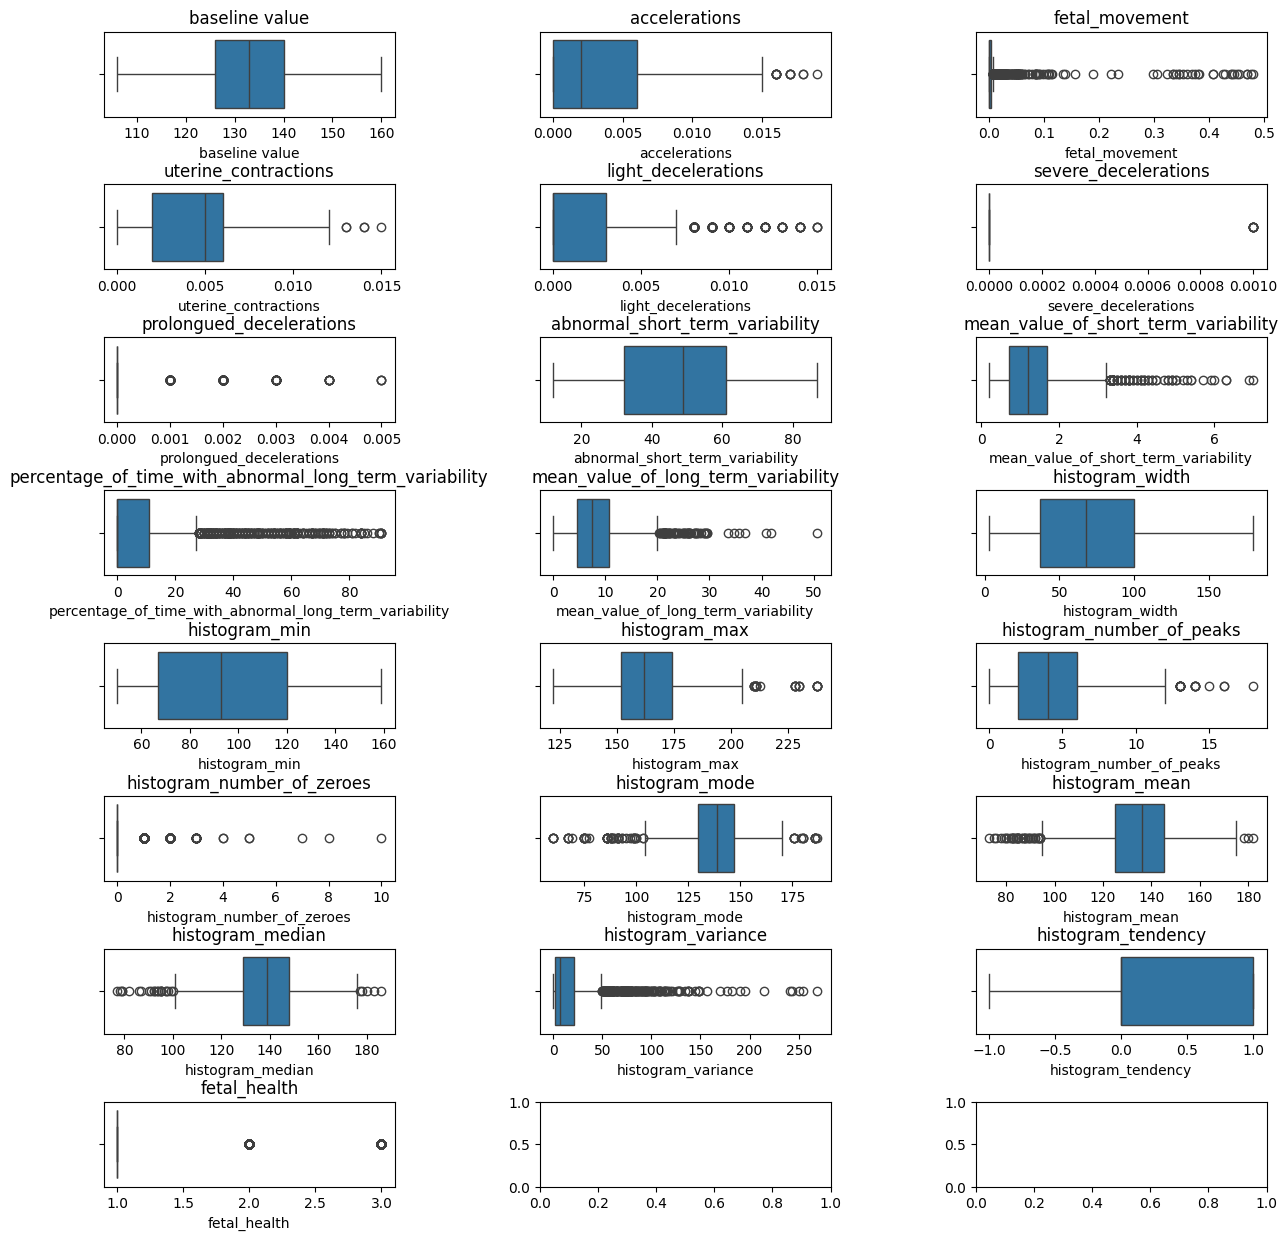

In [ ]:
num_cols = 3
num_rows = math.ceil(len(df.columns) / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

plt.subplots_adjust(hspace=0.8, wspace=0.5)

for i, column in enumerate(df.columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(column)

plt.show()

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,139.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### Normalisasi

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

### Normalisasi MIN-MAX Scaler

In [ ]:
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [ ]:
df_minmax.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.259259,0.000000,0.0,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,...,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0
1,0.481481,0.315789,0.0,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.333333,0.1,0.622047,0.577982,0.577982,0.044610,0.5
2,0.500000,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5
3,0.518519,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0
4,0.481481,0.368421,0.0,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0


In [ ]:
y.head()

,fetal_health
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0


# (6) Mengkonstruksi Data

### Menentukan data target dan input

In [ ]:
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

### MinMax Scaler

In [ ]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### SMOTE

<ipython-input-32-d91aa56766a4>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(fetal_health_counts))


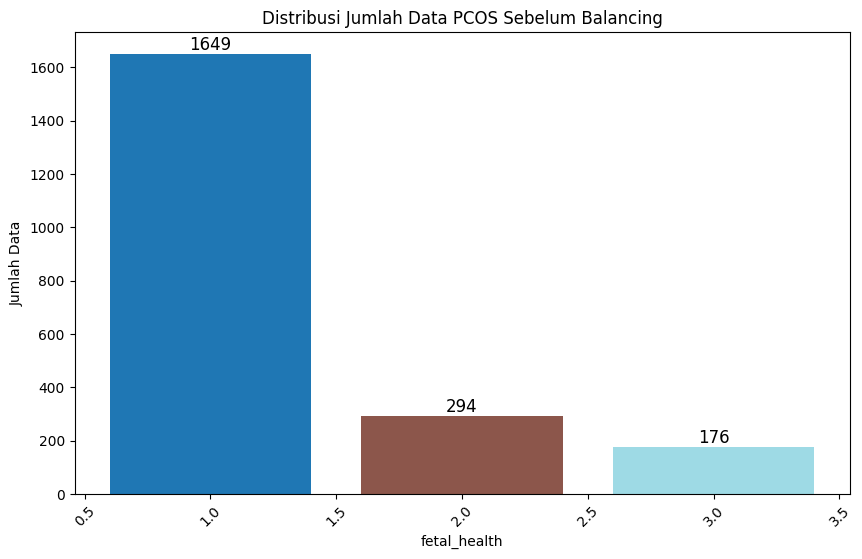

In [ ]:
fetal_health_counts = df['fetal_health'].value_counts()

colors = plt.cm.get_cmap('tab20', len(fetal_health_counts))
plt.figure(figsize=(10, 6))
bars = plt.bar(fetal_health_counts.index, fetal_health_counts.values, color=colors(range(len(fetal_health_counts))))

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=12)

plt.xlabel('fetal_health')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data PCOS Sebelum Balancing')
plt.xticks(rotation=45)

plt.show()

fetal_health
2.0    1649
1.0    1649
3.0    1649
Name: count, dtype: int64


<ipython-input-33-6373ff857473>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(fetal_health_counts))


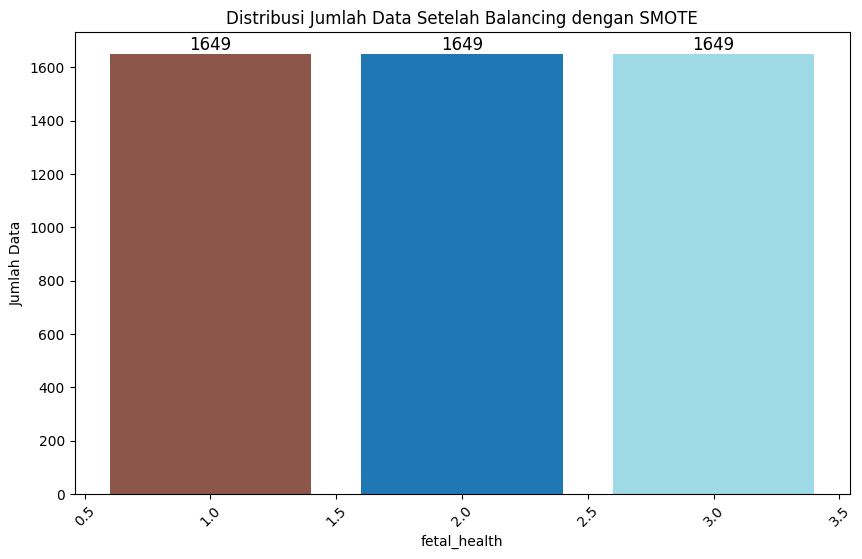

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

fetal_health_counts = y_resampled.value_counts()
colors = plt.cm.get_cmap('tab20', len(fetal_health_counts))
plt.figure(figsize=(10, 6))
bars = plt.bar(fetal_health_counts.index, fetal_health_counts.values, color=colors(range(len(fetal_health_counts))))

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=12)

plt.xlabel('fetal_health')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data Setelah Balancing dengan SMOTE')
plt.xticks(rotation=45)

plt.show()

### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Menggunakan Mutual Information sebagai metode Feature Selection
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(df_scaled, y)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x79bf9bbd9240>)

In [ ]:
# Menyusun skor dalam DataFrame
mi_scores = pd.DataFrame({'Feature': X.columns, 'Score': mi_selector.scores_})
mi_scores_sorted = mi_scores.sort_values(by='Score', ascending=False)

# Menampilkan skor fitur yang telah diurutkan
print(mi_scores_sorted)

                                              Feature     Score
8                mean_value_of_short_term_variability  0.218358
9   percentage_of_time_with_abnormal_long_term_var...  0.199581
7                     abnormal_short_term_variability  0.191993
17                                     histogram_mean  0.169200
18                                   histogram_median  0.138808
16                                     histogram_mode  0.137327
11                                    histogram_width  0.132873
1                                       accelerations  0.129941
12                                      histogram_min  0.123834
0                                      baseline value  0.119464
19                                 histogram_variance  0.113934
6                            prolongued_decelerations  0.089878
10                mean_value_of_long_term_variability  0.089488
13                                      histogram_max  0.064633
3                                uterine

In [ ]:
# Memilih 10 fitur terbaik berdasarkan skor Mutual Information
selected_features = mi_scores.nlargest(10, 'Score')['Feature'].tolist()
print("Feature dengan nilai Mutual Information tertinggi:", selected_features)

Feature dengan nilai Mutual Information tertinggi: ['mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability', 'histogram_mean', 'histogram_median', 'histogram_mode', 'histogram_width', 'accelerations', 'histogram_min', 'baseline value']


In [ ]:
data_selected = df[selected_features]

In [ ]:
data_selected.head()

,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,abnormal_short_term_variability,histogram_mean,histogram_median,histogram_mode,histogram_width,accelerations,histogram_min,baseline value
0,0.5,43.0,73.0,137.0,121.0,120.0,64.0,0.000,62.0,120.0
1,2.1,0.0,17.0,136.0,140.0,139.0,130.0,0.006,68.0,132.0
2,2.1,0.0,16.0,135.0,138.0,141.0,130.0,0.003,68.0,133.0
3,2.4,0.0,16.0,134.0,137.0,137.0,117.0,0.003,53.0,134.0
4,2.4,0.0,16.0,136.0,138.0,137.0,117.0,0.007,53.0,132.0


In [ ]:
data_selected.describe()

,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,abnormal_short_term_variability,histogram_mean,histogram_median,histogram_mode,histogram_width,accelerations,histogram_min,baseline value
count,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000
mean,1.333506,9.852761,47.009438,134.607834,138.092968,137.633790,70.513450,0.003182,93.553091,133.308636
std,0.884005,18.405901,17.184163,15.598315,14.468433,15.604287,38.984037,0.003868,29.560503,9.836341
min,0.200000,0.000000,12.000000,73.000000,77.000000,60.000000,3.000000,0.000000,50.000000,106.000000
25%,0.700000,0.000000,32.000000,125.000000,129.000000,129.500000,37.000000,0.000000,67.000000,126.000000
50%,1.200000,0.000000,49.000000,136.000000,139.000000,139.000000,68.000000,0.002000,93.000000,133.000000
75%,1.700000,11.000000,61.000000,145.000000,148.000000,147.000000,100.000000,0.006000,120.000000,140.000000
max,7.000000,91.000000,87.000000,182.000000,186.000000,187.000000,180.000000,0.019000,159.000000,160.000000


# (7) Menentukan Label Data

### Menentukan input dan target data baru

In [ ]:
X = data_selected[selected_features]
y = df['fetal_health']

In [ ]:
X.head()

,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,abnormal_short_term_variability,histogram_mean,histogram_median,histogram_mode,histogram_width,accelerations,histogram_min,baseline value
0,0.5,43.0,73.0,137.0,121.0,120.0,64.0,0.000,62.0,120.0
1,2.1,0.0,17.0,136.0,140.0,139.0,130.0,0.006,68.0,132.0
2,2.1,0.0,16.0,135.0,138.0,141.0,130.0,0.003,68.0,133.0
3,2.4,0.0,16.0,134.0,137.0,137.0,117.0,0.003,53.0,134.0
4,2.4,0.0,16.0,136.0,138.0,137.0,117.0,0.007,53.0,132.0


In [ ]:
y.head()

,fetal_health
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0


### Split Data (70:30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# (8) Membuat Model

### Naive Bayes

In [ ]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

### Decision Tree

In [ ]:
classifier_dt = DecisionTreeClassifier(random_state=42)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Random Forest

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### SVM

In [ ]:
classifier_svm = SVM(random_state=42)
classifier_svm.fit(X_train, y_train)

SVC(random_state=42)

# (9) Evaluasi Model

### Define function evaluation

fungsi evaluation ini digunakan untuk menghitung beberapa metrik evaluasi pada model

In [ ]:
def evaluation(y_test, y_pred):
  acc = accuracy_score(y_test, y_pred)
  rcl = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  ps = precision_score(y_test, y_pred, average='weighted')

  metric_dict = {
    'accuracy': round(acc, 3),
    'recall': round(rcl, 3),
    'F1 score': round(f1, 3),
    'Precision score': round(ps, 3)
  }

  return print(metric_dict)

### Naive Bayes

In [ ]:
y_pred_nb = classifier_nb.predict(X_test)

# Evaluate the Gaussian NB model
print("\nGaussian NB Model:")
accuracy_nb = round(accuracy_score(y_test, y_pred_nb), 3)
print("Accuracy:",accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Gaussian NB Model:
Accuracy: 0.832
Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.85      0.91       494
         2.0       0.52      0.86      0.65        87
         3.0       0.56      0.58      0.57        55

    accuracy                           0.83       636
   macro avg       0.68      0.77      0.71       636
weighted avg       0.87      0.83      0.84       636



In [ ]:
evaluation(y_test, y_pred_nb)

{'accuracy': 0.832, 'recall': 0.832, 'F1 score': 0.844, 'Precision score': 0.872}


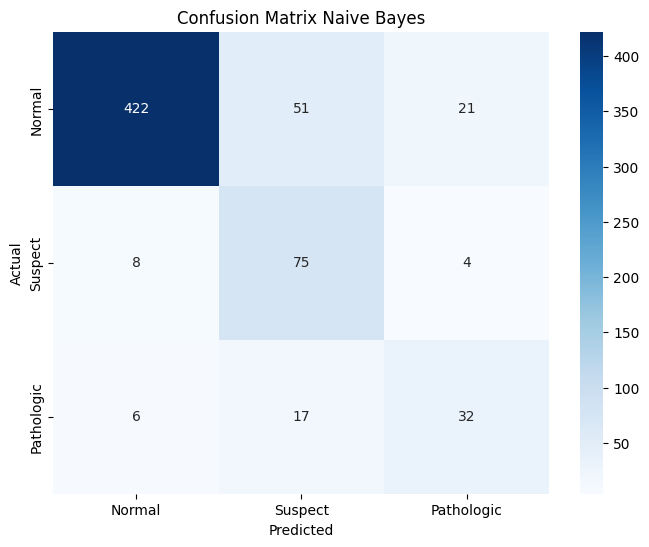

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Suspect', 'Pathologic'],
            yticklabels=['Normal', 'Suspect', 'Pathologic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Naive Bayes")
plt.show()

### Decision Tree

In [ ]:
y_pred_dt = classifier_dt.predict(X_test)

print("\nDecision Tree Model:")
accuracy_dt = round(accuracy_score(y_test, y_pred_dt), 3)
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Model:
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

         1.0       0.95      0.94      0.94       494
         2.0       0.75      0.76      0.75        87
         3.0       0.82      0.91      0.86        55

    accuracy                           0.91       636
   macro avg       0.84      0.87      0.85       636
weighted avg       0.91      0.91      0.91       636



In [ ]:
evaluation(y_test, y_pred_dt)

{'accuracy': 0.91, 'recall': 0.91, 'F1 score': 0.911, 'Precision score': 0.912}


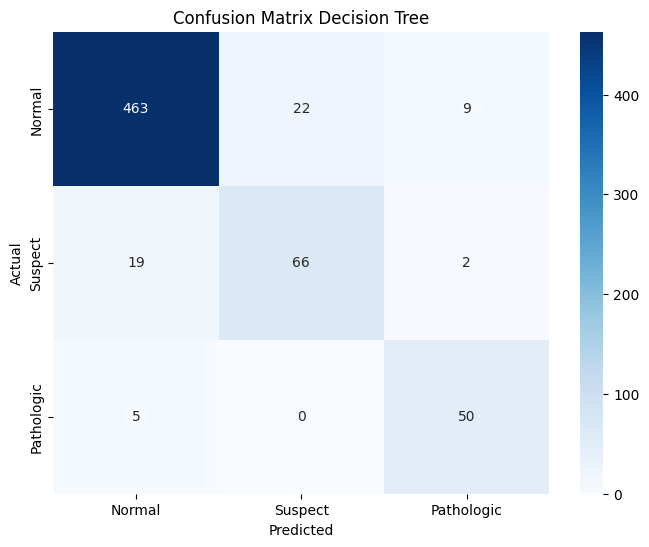

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Suspect', 'Pathologic'],
            yticklabels=['Normal', 'Suspect', 'Pathologic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Decision Tree")
plt.show()

### Random Forest

In [ ]:
y_pred_rf = classifier_rf.predict(X_test)

print("\nDecision Random Forest:")
accuracy_rf = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Decision Random Forest:
Accuracy: 0.937
Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.96       494
         2.0       0.84      0.82      0.83        87
         3.0       0.86      0.87      0.86        55

    accuracy                           0.94       636
   macro avg       0.89      0.88      0.89       636
weighted avg       0.94      0.94      0.94       636



In [ ]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.937, 'recall': 0.937, 'F1 score': 0.937, 'Precision score': 0.937}


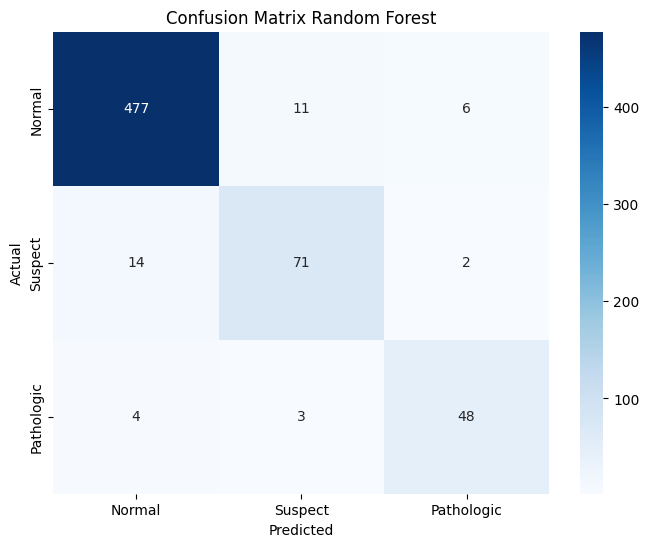

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Suspect', 'Pathologic'],
            yticklabels=['Normal', 'Suspect', 'Pathologic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Random Forest")
plt.show()

### SVM

In [ ]:
y_pred_svm = classifier_svm.predict(X_test)

print("\nSVM Model:")
accuracy_svm = round(accuracy_score(y_test, y_pred_svm), 3)
print("Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Model:
Accuracy: 0.847
Classification Report:
              precision    recall  f1-score   support

         1.0       0.88      0.97      0.92       494
         2.0       0.52      0.38      0.44        87
         3.0       0.90      0.51      0.65        55

    accuracy                           0.85       636
   macro avg       0.77      0.62      0.67       636
weighted avg       0.83      0.85      0.83       636



In [ ]:
evaluation(y_test, y_pred_svm)

{'accuracy': 0.847, 'recall': 0.847, 'F1 score': 0.833, 'Precision score': 0.835}


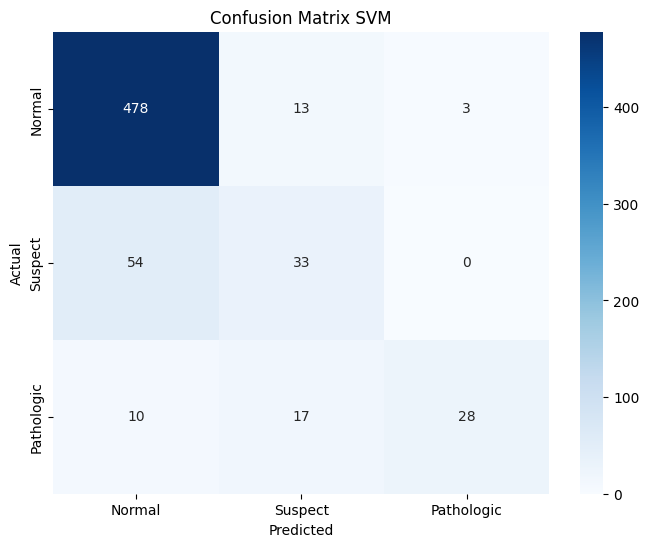

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Suspect', 'Pathologic'],
            yticklabels=['Normal', 'Suspect', 'Pathologic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVM")
plt.show()

### Visualisasi Perbandingan Model

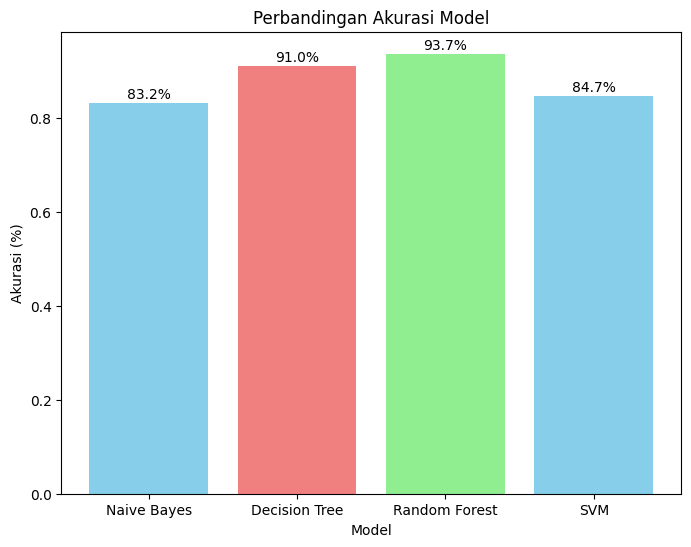

In [ ]:
accuracy_nb = accuracy_nb
accuracy_dt = accuracy_dt
accuracy_rf = accuracy_rf  # Example: 0.92
accuracy_svm = accuracy_svm # Example: 0.88

models = ['Naive Bayes', 'Decision Tree','Random Forest', 'SVM',]
accuracies = [accuracy_nb, accuracy_dt, accuracy_rf, accuracy_svm]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi (%)')

# Add accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v * 100, 2)) + '%', ha='center')

plt.show()

# (10) Optimalisasi Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC as SVM
from sklearn.ensemble import RandomForestClassifier


RandomizedSearchCV adalah sebuah teknik untuk hyperparameter tuning dalam machine learning yang digunakan untuk mencari kombinasi terbaik dari hyperparameter untuk model yang sedang dilatih

### Naive Bayes

In [ ]:
# Define the parameter dist for Naive Bayes
param_dist_nb = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}

# Setup RandomizedSearchCV
nb_random_search = RandomizedSearchCV(estimator=classifier_nb, param_distributions=param_dist_nb,
                                      n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

In [ ]:
nb_random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=100. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'var_smoothing': [1e-09, 1e-08, 1e-07,
                                                          1e-06, 1e-05]},
                   random_state=42, scoring='accuracy')

In [ ]:
y_pred_nb = nb_random_search.predict(X_test)
accuracy_nbcustom = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi hasil tuning Naive Bayes: {accuracy_nbcustom}")
print(classification_report(y_test, y_pred_nb))

Akurasi hasil tuning Naive Bayes: 0.8317610062893082
              precision    recall  f1-score   support

         1.0       0.97      0.85      0.91       494
         2.0       0.52      0.86      0.65        87
         3.0       0.56      0.58      0.57        55

    accuracy                           0.83       636
   macro avg       0.68      0.77      0.71       636
weighted avg       0.87      0.83      0.84       636



### Decision Tree

In [ ]:
param_dt = {
    'criterion': ['gini'], # Menentukan fungsi yang digunakan untuk mengukur kualitas pemisahan di setiap node.
    'max_depth': [10, 20, 30],   # Kedalaman maksimum pohon keputusan
    'min_samples_split': [2, 5, 10],   # Menentukan jumlah minimum sampel yang diperlukan untuk membagi sebuah node.
    'min_samples_leaf': [1, 2, 4]      # Menentukan jumlah minimum sampel yang diperlukan pada daun (leaf).(titik akhir dalam keputusan)
}

dt_custom = RandomizedSearchCV(DecisionTreeClassifier(), param_dt, verbose=2, n_jobs=-1)

In [ ]:
dt_custom.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   verbose=2)

akurasi

In [ ]:
y_pred = dt_custom.predict(X_test)
accuracy_dtcustom = accuracy_score(y_test, y_pred)
print(f"Akurasi hasil tuning DT : {accuracy_dtcustom}")
print(classification_report(y_test, y_pred))

Akurasi hasil tuning DT : 0.9088050314465409
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95       494
         2.0       0.81      0.66      0.73        87
         3.0       0.84      0.84      0.84        55

    accuracy                           0.91       636
   macro avg       0.86      0.82      0.84       636
weighted avg       0.91      0.91      0.91       636



### Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier  # Import the RandomForestClassifier

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Now use 'rf' in RandomizedSearchCV
rf_custom = RandomizedSearchCV(rf, param_grid, n_iter=3, cv=5, n_jobs=-1)

In [ ]:
rf_custom.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]})

In [ ]:
y_pred = rf_custom.predict(X_test)
accuracy_rfcustom = accuracy_score(y_test, y_pred)
print(f"Akurasi hasil tuning Random Forest: {accuracy_rfcustom}")
print(classification_report(y_test, y_pred))

Akurasi hasil tuning Random Forest: 0.9371069182389937
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.96       494
         2.0       0.86      0.78      0.82        87
         3.0       0.87      0.87      0.87        55

    accuracy                           0.94       636
   macro avg       0.90      0.88      0.89       636
weighted avg       0.94      0.94      0.94       636



### SVM

In [ ]:
param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['linear','rbf',],
    'gamma': ['scale', 0.1],
}
# Create an instance of the SVM classifier
svm_classifier = SVM(random_state=42)
# Pass the instance to RandomizedSearchCV
svm_custom = RandomizedSearchCV(svm_classifier, param_grid_svm, n_iter=3, cv=3, n_jobs=-1)

In [ ]:
svm_custom.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_iter=3, n_jobs=-1,
                   param_distributions={'C': [0.1, 1], 'gamma': ['scale', 0.1],
                                        'kernel': ['linear', 'rbf']})

akurasi

In [ ]:
y_pred = svm_custom.predict(X_test)
accuracy_svmcustom = accuracy_score(y_test, y_pred)
print(f"Akurasi hasil tuning svm : {accuracy_svmcustom}")
print(classification_report(y_test, y_pred))

Akurasi hasil tuning svm : 0.8616352201257862
              precision    recall  f1-score   support

         1.0       0.90      0.96      0.93       494
         2.0       0.62      0.40      0.49        87
         3.0       0.75      0.71      0.73        55

    accuracy                           0.86       636
   macro avg       0.76      0.69      0.72       636
weighted avg       0.85      0.86      0.85       636



### Visualisasi perbandingan

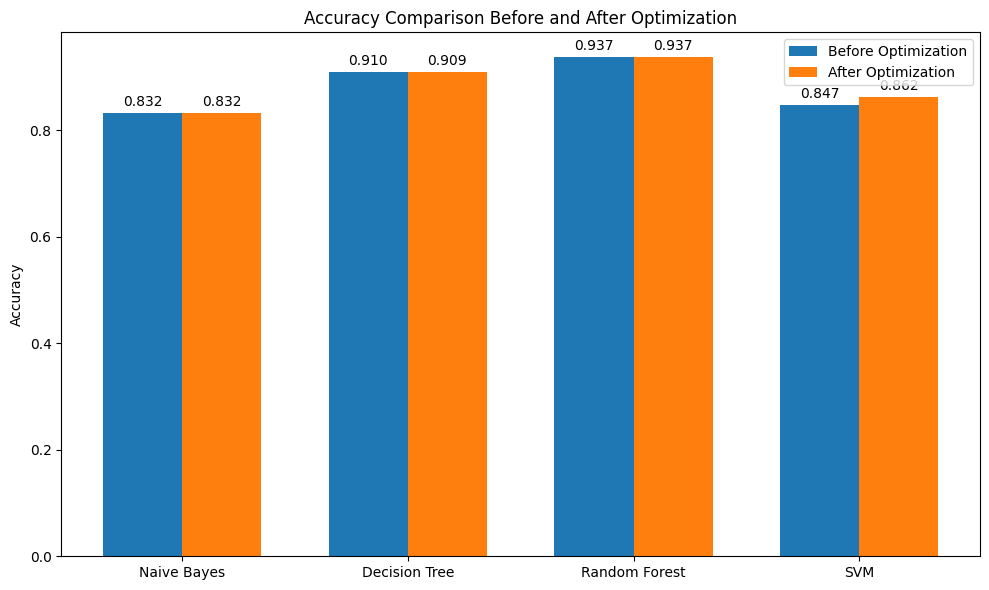

In [ ]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM']
accuracies_before = [accuracy_nb, accuracy_dt, accuracy_rf, accuracy_svm]
accuracies_after = [accuracy_nbcustom, accuracy_dtcustom, accuracy_rfcustom, accuracy_svmcustom]

x = range(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, accuracies_before, width, label='Before Optimization')
rects2 = ax.bar([i + width for i in x], accuracies_after, width, label='After Optimization')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison Before and After Optimization')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(models)
ax.legend()

# Add accuracy values on top of the bars
def addlabels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

addlabels(rects1)
addlabels(rects2)

fig.tight_layout()
plt.show()